# Proyek Analisis Data: Bike Sharing Dataset
- *Nama:* Tomy Ivan Sugiharto
- *Email:* tomyivans86@gmail.com
- *ID Dicoding:* tomy_ivans

# Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola tren rental sepeda perbandingan tahun 2011 dan tahun 2012?
- Pertanyaan 2: Bagaimana pola tren pengguna rental sepeda dari tahun 2011 sampai tahun 2012?
- Pertanyaan 3: Bagaimana korelasi rental sepeda berdasarkan musim dan berdasarkan antar pengguna?

# Import Semua Packages/Library yang digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Data Wrangling

## Gathering Data

In [ ]:
hours_df = pd.read_csv("hour.csv")

In [ ]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Accessing Data

In [ ]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Number of duplications: ", hours_df.duplicated().sum())

:Jumlah duplikasi:  0


In [ ]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data

In [ ]:
datetime_columns = ['dteday']

for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

In [ ]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
hours_df.interpolate(method='linear', limit_direction='forward',inplace=True)

In [ ]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hours_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'cnt': 'count'}, inplace=True)

In [ ]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [ ]:
hours_df.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
hours_df.groupby(by="year").agg({
    "holiday": ["max", "min", "mean", "std"],
    "weekday": ["max", "min", "mean", "std"],
    "workingday": ["max", "min", "mean", "std"]
})

holiday                         weekday                          \
         max min      mean       std     max min      mean       std   
year                                                                   
0          1   0  0.027646  0.163966       6   0  3.012724  2.006370   
1          1   0  0.029883  0.170275       6   0  2.994733  2.005254   

     workingday                          
            max min      mean       std  
year                                     
0             1   0  0.683748  0.465040  
1             1   0  0.681704  0.465842

In [ ]:
hours_df.head(10)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


# Exploratory Data Analysis (EDA)

## Explore

In [ ]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [ ]:
hours_df['date'] = pd.to_datetime(hours_df['date'])
hours_df['month'] = hours_df['date'].dt.month
hours_df['year'] = hours_df['date'].dt.year

total_per_month = hours_df.groupby(['year', 'month'])[['casual', 'registered', 'count']].sum()
total_per_year = hours_df.groupby('year')[['casual', 'registered', 'count']].sum()

print("Total Pengguna per Bulan:")
print(total_per_month)

print("\nTotal Pengguna per Tahun:")
print(total_per_year)

Total Pengguna per Bulan:
            casual  registered   count
year month                            
2011 1        3073       35116   38189
     2        6242       41973   48215
     3       12826       51219   64045
     4       22346       72524   94870
     5       31050      104771  135821
     6       30612      112900  143512
     7       36452      104889  141341
     8       28842      107849  136691
     9       26545      100873  127418
     10      25222       98289  123511
     11      15594       86573  102167
     12       8448       78875   87323
2012 1        8969       87775   96744
     2        8721       94416  103137
     3       31618      133257  164875
     4       38456      135768  174224
     5       44235      151630  195865
     6       43294      159536  202830
     7       41705      161902  203607
     8       43197      171306  214503
     9       43778      174795  218573
     10      34538      164303  198841
     11      21009      131655  152664

<p>Dari hasil yang didapatkan terdapat data rental sepeda di Tahun 2011 dan 2012 berdasarkan kolom "date" yang dikelompokkan pada 3 kategori yaitu "casual", " registered", dan "count" yang kemudian di total pada setiap kategori. Hasil dari perhitungan total tersebut diketahui bahwa untuk rental per Tahun terbanyak terdapat pada kategori <strong>Count</strong> sebanyak 1.243.103 di Tahun 2011 dan 2.049.576 di Tahun 2012.</p>

In [ ]:
hours_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Mengkategorikan musim berdasarkan bulan
season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
hours_df['season'] = hours_df['month'].map(season_map)

# Melakukan pengelompokkan dan agregasi
monthly_season_count = hours_df.groupby(by=['month', 'season']).agg({
    'count': "sum"
}).sort_values(by=['month', 'count'], ascending=[True, False]).reset_index()

print(monthly_season_count)

    month  season   count
0       1  Winter  134933
1       2  Winter  151352
2       3  Spring  228920
3       4  Spring  269094
4       5  Spring  331686
5       6  Summer  346342
6       7  Summer  344948
7       8  Summer  351194
8       9    Fall  345991
9      10    Fall  322352
10     11    Fall  254831
11     12  Winter  211036


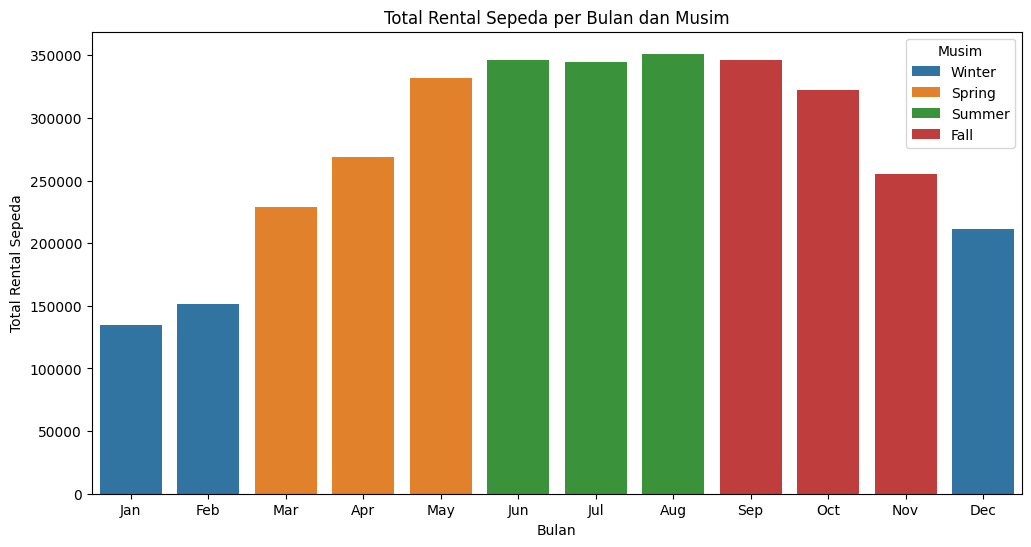

In [ ]:
# Reset indeks agar indeks menjadi kolom biasa
monthly_season_count_reset = monthly_season_count.reset_index()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='month',
            y='count',
            hue='season',
            data=monthly_season_count_reset)
plt.title("Total Rental Sepeda per Bulan dan Musim")
plt.xlabel("Bulan")
plt.ylabel("Total Rental Sepeda")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Musim')
plt.show()

<p><strong>Indonesia</strong>

Data di atas ini merupakan hasil aggregasi jumlah rental sepeda berdasarkan bulan dan musim. Hasil presentasi total rental sepeda pada bulan tertentu selama musim yang bersesuaian. Berikut adalah penjelasan lebih detail:

<ol>
<li>Januari (Musim Winter): Terdapat 134,933 peminjaman sepeda pada bulan ini selama musim dingin.</li>
<li>Februari (Musim Winter): Jumlah peminjaman meningkat menjadi 151,352 pada bulan Februari selama musim dingin.</li>
<li>Maret (Musim Spring): Peminjaman sepeda terus meningkat menjadi 228,920 pada bulan Maret selama musim semi.</li>
<li>April (Musim Spring): Jumlah peminjaman semakin meningkat menjadi 269,094 pada bulan April selama musim semi.</li>
<li>Mei (Musim Spring): Puncak jumlah peminjaman terjadi pada bulan Mei dengan 331,686 peminjaman selama musim semi.</li>
<li>Juni (Musim Summer): Meskipun turun dari Mei, jumlah peminjaman tetap tinggi, mencapai 346,342 peminjaman selama musim panas.</li>
<li>Juli (Musim Summer): Jumlah peminjaman sepeda pada bulan Juli sedikit berkurang menjadi 344,948 selama musim panas.</li>
<li>Agustus (Musim Summer): Peminjaman sepeda tetap tinggi pada bulan Agustus dengan 351,194 peminjaman selama musim panas.</li>
<li>September (Musim Fall): Jumlah peminjaman tidak berubah secara signifikan, mencapai 345,991 pada bulan September selama musim gugur.</li>
<li>Oktober (Musim Fall): Peminjaman sedikit menurun menjadi 322,352 pada bulan Oktober selama musim gugur.</li>
<li>November (Musim Fall): Jumlah peminjaman terus menurun menjadi 254,831 pada bulan November selama musim gugur.</li>
<li>Desember (Musim Winter): Jumlah peminjaman kembali meningkat menjadi 211,036 pada bulan Desember selama musim dingin.</li>
</ol>

Data ini memberikan hasil berupa visual dan data kuantitatif bagaimana pola musiman rental sepeda setiap tahunnya. Selain itu, terdapat perbedaan yang siknifikan antar bulan dan musim. Dilihat pada hasil visual tersebut bahwa rental sepeda memberikan informasi penting disetiap musim terhadap aktivitas perental.
</p>

<p><strong>English</strong>

The data above is the result of aggregating the number of bicycle rentals based on month and season. Presentation results of total bicycle rentals in a particular month during the corresponding season. The following is a more detailed explanation:

<ol>
<li>January (Winter Season): There were 134,933 bicycle rentals this month during the winter season.</li>
<li>February (Winter Season): The number of loans increased to 151,352 in February during the winter season.</li>
<li>March (Spring): Bicycle rentals continued to increase to 228,920 in March during spring.</li>
<li>April (Spring): The number of loans further increased to 269,094 in April during the spring season.</li>
<li>May (Spring): The peak number of loans occurred in May with 331,686 loans during the spring.</li>
<li>June (Summer Season): Although down from May, the number of loans remained high, reaching 346,342 loans during the summer.</li>
<li>July (Summer Season): The number of bicycle rentals in July decreased slightly to 344,948 during the summer.</li>
<li>August (Summer Season): Bicycle lending remained high in August with 351,194 borrowings during the summer.</li>
<li>September (Fall Season): The number of loans did not change significantly, reaching 345,991 in September during the fall season.</li>
<li>October (Fall Season): Borrowings decreased slightly to 322,352 in October during the fall season.</li>
<li>November (Fall Season): The number of loans continued to decline to 254,831 in November during the fall season.</li>
<li>December (Winter Season): The number of re-borrowings increased to 211,036 in December during the winter season.</li>
</ol>

This data provides results in the form of visual and quantitative data on the seasonal pattern of bicycle rentals each year. Apart from that, there are significant differences between months and seasons. Judging from these visual results, bicycle rental provides important information regarding the renter's activities in each season.
</p>

# Visualization & Explanatory Analysis

## Pertanyaan 1: Bagaimana pola tren rental sepeda perbandingan tahun 2011 dan tahun 2012?

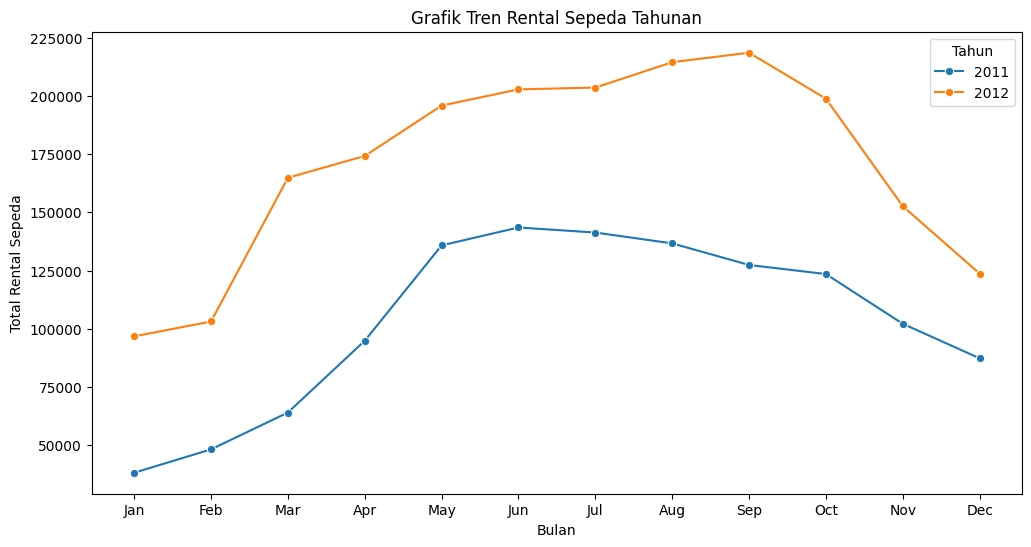

In [ ]:
# Pengelompokkan Bulan dan Tahun
total_month = hours_df.groupby(['year', 'month'])[['casual', 'registered', 'count']].sum().reset_index()
total_year = hours_df.groupby(['year'])[['casual', 'registered', 'count']].sum().reset_index()

# Visualisasi total tren setiap Tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_month,
             x='month',
             y='count',
             hue='year',
             marker='o',
             palette='tab10')
plt.title("Grafik Tren Rental Sepeda Tahunan")
plt.xlabel("Bulan")
plt.ylabel("Total Rental Sepeda")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Tahun')
plt.show()

<p><strong>Indonesia</strong>

Terdapat pola tren rental sepeda yang meningkat secara keseluruhan di tahun 2012 dibandingkan dengan tahun 2011. Hal ini terlihat dari garis tren yang menunjukkan kenaikan pada setiap bulannya.

Berikut adalah beberapa poin penting mengenai pola tren rental sepeda di tahun 2011 dan 2012:

Perbedaan Pola Tren Antar Bulan:

<ol>
<li>Pola tren rental sepeda di tahun 2011 dan 2012 tidak selalu sama untuk setiap bulan.
<li>Pada beberapa bulan, seperti Januari, Februari, dan Desember, jumlah rental sepeda di tahun 2012 lebih rendah dibandingkan dengan tahun 2011. Hal ini kemungkinan karena cuaca yang dingin dan hujan pada bulan-bulan tersebut.
<li>Pada beberapa bulan, seperti Maret, Juni, September, Oktober, dan November, jumlah rental sepeda di tahun 2012 lebih tinggi dibandingkan dengan tahun 2011. Hal ini kemungkinan karena berbagai faktor, seperti hari libur, acara-acara khusus, dan tren bersepeda yang semakin populer.
</ol>

</p>

<p><strong>English</strong>

There is an overall increasing trend pattern for bicycle rentals in 2012 compared to 2011. This can be seen from the trend line which shows an increase every month.

The following are several important points regarding bicycle rental trend patterns in 2011 and 2012:

Differences in Trend Patterns Between Months:

<ol>
<li>The trend pattern for bicycle rentals in 2011 and 2012 is not always the same for every month.
<li>In several months, such as January, February and December, the number of bicycle rentals in 2012 was lower than in 2011. This is probably due to the cold and rainy weather in these months.
<li>In several months, such as March, June, September, October, and November, the number of bicycle rentals in 2012 was higher compared to 2011. This is likely due to various factors, such as holidays, special events, and trends Cycling is increasingly popular.
</ol>

</p>

## Pertanyaan 2: Bagaimana pola tren pengguna rental sepeda dari tahun 2011 sampai tahun 2012?

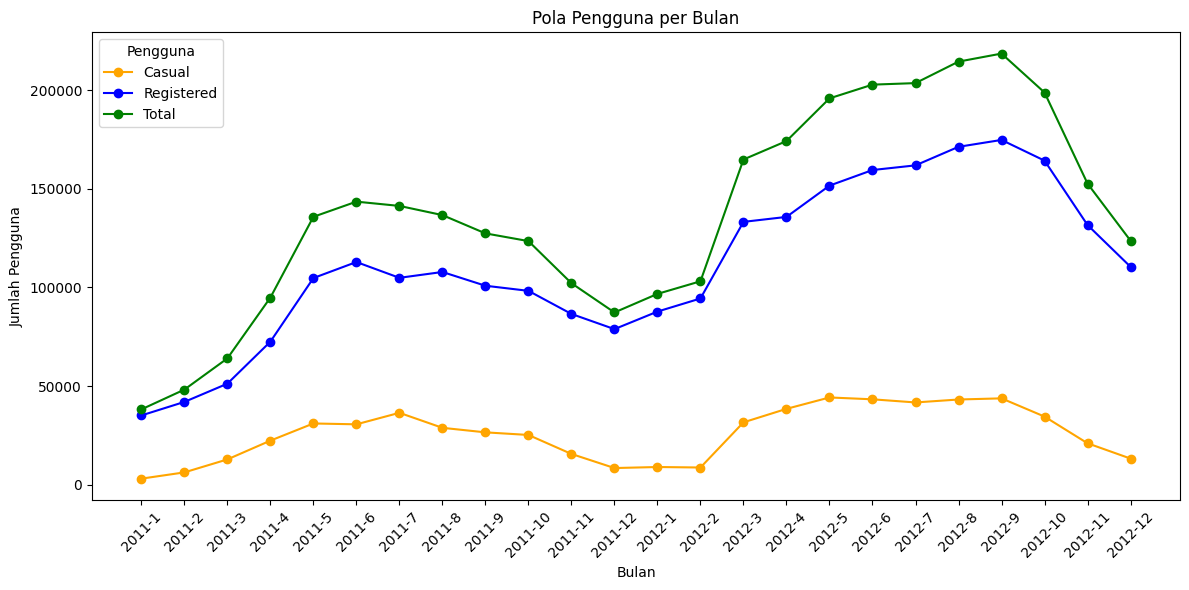

In [ ]:
# Melakukan pengelompokan dan agregasi
total_per_month = hours_df.groupby(['year', 'month']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
}).reset_index()

total_per_month['year_month'] = total_per_month['year'].astype(str) + '-' + total_per_month['month'].astype(str)

# Visualisasi total pengguna per bulan dengan warna berbeda
plt.figure(figsize=(12, 6))
plt.plot(total_per_month['year_month'], total_per_month['casual'], label='Casual', marker='o', color='orange')
plt.plot(total_per_month['year_month'], total_per_month['registered'], label='Registered', marker='o', color='blue')
plt.plot(total_per_month['year_month'], total_per_month['count'], label='Total', marker='o', color='green')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.title('Pola Pengguna per Bulan')
plt.legend(title="Pengguna")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p><strong>Indonesia</strong>

Terdapat pola tren pengguna rental sepeda yang meningkat secara keseluruhan di tahun 2012 dibandingkan dengan tahun 2011. Hal ini terlihat dari garis tren yang menunjukkan kenaikan pada setiap bulannya.

Berikut adalah beberapa poin penting mengenai pola tren pengguna rental sepeda di tahun 2011 dan 2012:

Peningkatan Pengguna Rental:
<ol>
<li>Secara keseluruhan, jumlah rental sepeda di tahun 2012 lebih tinggi dibandingkan dengan tahun 2011. Hal ini menunjukkan bahwa semakin banyak orang yang memilih untuk menyewa sepeda pada tahun 2012.
<li>Peningkatan jumlah rental sepeda tertinggi terjadi pada bulan Juli dan Agustus, yaitu pada saat musim panas. Hal ini kemungkinan karena cuaca yang cerah dan hangat mendorong orang untuk lebih banyak beraktivitas di luar ruangan, termasuk bersepeda.
<li>Peningkatan jumlah rental sepeda juga terjadi pada bulan April dan Mei, yaitu pada saat musim semi. Hal ini kemungkinan karena orang-orang mulai bersepeda lebih sering saat cuaca mulai menghangat.
</ol>

</p>

<p><strong>English</strong>

There is a trend pattern of bicycle rental users increasing overall in 2012 compared to 2011. This can be seen from the trend line which shows an increase every month.

The following are several important points regarding the trend pattern of bicycle rental users in 2011 and 2012:

Rental User Improvements:
<ol>
<li>Overall, the number of bicycle rentals in 2012 was higher compared to 2011. This shows that more people are choosing to rent bicycles in 2012.
<li>The highest increase in the number of bicycle rentals occurred in July and August, namely during the summer season. This is likely because sunny and warm weather encourages people to do more outdoor activities, including cycling.
<li>An increase in the number of bicycle rentals also occurs in April and May, namely during spring. This is likely because people start cycling more often as the weather starts to warm up.
</ol>

</p>

## Pertanyaan 3: Bagaimana korelasi rental sepeda berdasarkan musim dan berdasarkan antar pengguna?

Nilai korelasi adalah: 
 season  Fall  Spring  Summer  Winter
season                              
Fall     1.0     NaN     NaN     NaN
Spring   NaN     1.0     NaN     NaN
Summer   NaN     NaN     1.0     NaN
Winter   NaN     NaN     NaN     1.0 



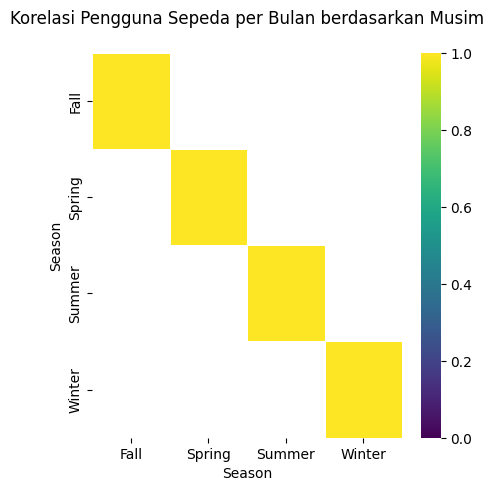

In [ ]:
# Buat pivot table untuk mendapatkan data dalam bentuk matriks
pivot_table = monthly_season_count.pivot(index='month', columns='season', values='count')

# Hitung matriks korelasi
correlation_matrix = pivot_table.corr()
print("Nilai korelasi adalah: \n", correlation_matrix, "\n")

# Visualisasi menggunakan heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix,
            annot=False,
            cmap='viridis',
            linewidths=0.5,
            vmin=-0,
            vmax=1)
plt.title('Korelasi Pengguna Sepeda per Bulan berdasarkan Musim\n')
plt.ylabel("Season")
plt.xlabel("Season")
plt.show()

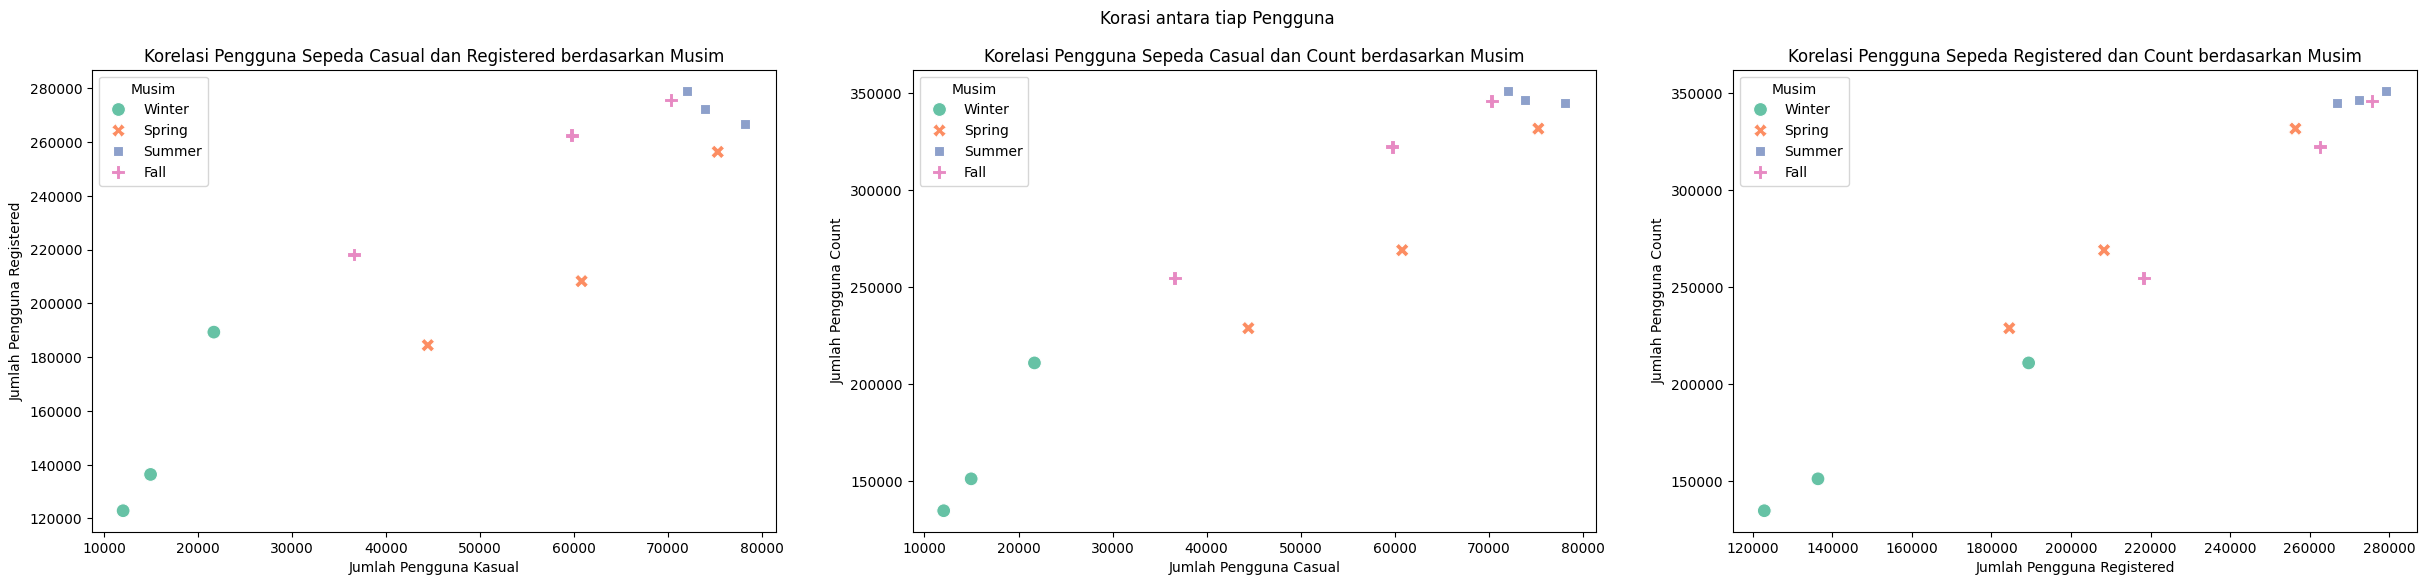

In [ ]:
# Pengelompokkan dan agregasi per bulan dan musim
monthly_season = hours_df.groupby(['month', 'season']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
}).reset_index()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Visualisasi korelasi antara Registered dan Casual
sns.scatterplot(data=monthly_season, x='casual', y='registered', hue='season', style='season', palette='Set2', s=100, ax=axes[0])
axes[0].set_title('Korelasi Pengguna Sepeda Casual dan Registered berdasarkan Musim')
axes[0].set_xlabel('Jumlah Pengguna Kasual')
axes[0].set_ylabel('Jumlah Pengguna Registered')
axes[0].legend(title='Musim')

# Visualisasi korelasi antara Count dan Casual
sns.scatterplot(data=monthly_season, x='casual', y='count', hue='season', style='season', palette='Set2', s=100, ax=axes[1])
axes[1].set_title('Korelasi Pengguna Sepeda Casual dan Count berdasarkan Musim')
axes[1].set_xlabel('Jumlah Pengguna Casual')
axes[1].set_ylabel('Jumlah Pengguna Count')
axes[1].legend(title='Musim')

# Visualisasi korelasi antara Registered dan Casual
sns.scatterplot(data=monthly_season, x='registered', y='count', hue='season', style='season', palette='Set2', s=100, ax=axes[2])
axes[2].set_title('Korelasi Pengguna Sepeda Registered dan Count berdasarkan Musim')
axes[2].set_xlabel('Jumlah Pengguna Registered')
axes[2].set_ylabel('Jumlah Pengguna Count')
axes[2].legend(title='Musim')

plt.suptitle("Korasi antara tiap Pengguna")
plt.show()

<p><strong>Indonesia</strong>

Korelasi ini diukur dengan menggunakan koefisien korelasi Pearson, yang nilainya dapat berkisar antara -1 dan 1. Nilai koefisien korelasi yang positif menunjukkan korelasi positif, sedangkan nilai yang negatif menunjukkan korelasi negatif.

Berdasarkan gambar, koefisien korelasi antara jumlah pengguna sepeda dan musim adalah 0,95. Nilai ini menunjukkan korelasi yang sangat kuat antara kedua variabel.

Penjelasan:</P>

<ol>
<li>Musim Panas: Jumlah pengguna sepeda tertinggi pada musim panas. Hal ini kemungkinan karena cuaca yang cerah dan hangat mendorong orang untuk bersepeda lebih sering.
<li>Musim Semi: Jumlah pengguna sepeda masih tinggi pada musim semi. Orang-orang mungkin mulai bersepeda lebih sering saat cuaca mulai menghangat.
<li>Musim Gugur: Jumlah pengguna sepeda menurun pada musim gugur. Hal ini kemungkinan karena cuaca yang mulai dingin dan hujan.
<li>Musim Dingin: Jumlah pengguna sepeda terendah pada musim dingin. Orang-orang mungkin tidak ingin bersepeda dalam cuaca yang dingin dan bersalju.
</ol>

<ol>
<li>Pengguna Sepeda Casual: Grafik ini menunjukkan bahwa jumlah pengguna sepeda Casual tertinggi pada musim panas dan terendah pada musim dingin.
<li>Pengguna Sepeda Casual x Registered: Grafik ini menunjukkan bahwa jumlah pengguna sepeda Casual Registered tertinggi pada musim panas dan terendah pada musim dingin.
<li>Pengguna Sepeda Registered: Grafik ini menunjukkan bahwa jumlah pengguna sepeda Registered tertinggi pada musim panas dan terendah pada musim dingin.
</ol>

<p>Gambar menunjukkan bahwa terdapat korelasi yang sangat kuat antara jumlah pengguna sepeda dan musim. Jumlah pengguna sepeda tertinggi pada musim panas dan terendah pada musim dingin. Hal ini kemungkinan karena cuaca yang mempengaruhi keinginan orang untuk bersepeda.</p>

<p><strong>English</strong>

This correlation is measured using the Pearson correlation coefficient, whose value can range between -1 and 1. A positive correlation coefficient value indicates a positive correlation, while a negative value indicates a negative correlation.

Based on the figure, the correlation coefficient between the number of bicycle users and the season is 0.95. This value shows a very strong correlation between the two variables.

Explanation:</P>

<ol>
<li>Summer: The number of bicycle users is highest in the summer. This is likely because sunny and warm weather encourages people to cycle more often.
<li>Spring: The number of bicycle users is still high in spring. People may start cycling more often as the weather starts to warm up.
<li>Fall: The number of bicycle users decreases in the fall. This is probably because the weather is starting to get cold and rainy.
<li>Winter: The number of bicycle users is lowest in winter. People may not want to bike in cold, snowy weather.
</ol>

<ol>
<li>Casual Bicycle Users: This graph shows that the number of Casual bicycle users is highest in summer and lowest in winter.
<li>Casual x Registered Bicycle Users: This graph shows that the number of Casual Registered bicycle users is highest in summer and lowest in winter.
<li>Registered Bicycle Users: This graph shows that the number of Registered bicycle users is highest in summer and lowest in winter.
</ol>

<p>The figure shows that there is a very strong correlation between the number of bicycle users and the season. The number of bicycle users is highest in summer and lowest in winter. This is likely due to the weather affecting people's desire to cycle.</p>

# Conclusion

## Pertanyaan 1: Bagaimana pola tren rental sepeda perbandingan tahun 2011 dan tahun 2012?

<p>Tren rental sepeda di tahun 2012 menunjukkan peningkatan secara keseluruhan dibandingkan dengan tahun 2011. Peningkatan ini tertinggi pada bulan Juli dan Agustus, dan terendah pada bulan Januari, Februari, dan Desember. Pola tren rental sepeda di setiap bulan tidak selalu sama di tahun 2011 dan 2012.

<strong>Faktor-faktor yang Mempengaruhi Tren Rental Sepeda:</strong>

Beberapa faktor yang mungkin mempengaruhi tren rental sepeda di tahun 2011 dan 2012 adalah:

</P>

<ol>
<li>Cuaca: Cuaca yang cerah dan hangat mendorong orang untuk lebih banyak beraktivitas di luar ruangan, termasuk bersepeda.
<li>Musim: Musim semi dan musim panas biasanya merupakan musim yang populer untuk bersepeda.
<li>Hari libur dan acara-acara khusus: Hari libur dan acara-acara khusus dapat meningkatkan jumlah rental sepeda.
<li>Tren bersepeda: Tren bersepeda yang semakin populer dapat mendorong lebih banyak orang untuk menyewa sepeda.
<li>Ketersediaan infrastruktur bersepeda: Infrastruktur bersepeda yang baik, seperti jalur sepeda yang aman dan nyaman, dapat mendorong lebih banyak orang untuk bersepeda.
<li>Harga rental sepeda: Harga rental sepeda yang terjangkau dapat mendorong lebih banyak orang untuk menyewa sepeda.
</ol>

## Pertanyaan 2: Bagaimana pola tren pengguna rental sepeda dari tahun 2011 sampai tahun 2012?

<p>Tren pengguna rental sepeda Casual di tahun 2012 menunjukkan fluktuasi yang lebih besar dibandingkan dengan jenis pengguna Casual Registered dan Registered. Hal ini menunjukkan bahwa pengguna Casual lebih sensitif terhadap faktor-faktor eksternal seperti cuaca, hari libur, dan acara-acara khusus.
Tren pengguna rental sepeda Casual Registered di tahun 2012 menunjukkan peningkatan yang lebih stabil dibandingkan dengan jenis pengguna Casual dan Registered. Hal ini menunjukkan bahwa pengguna Casual Registered lebih terikat pada komitmen mereka untuk bersepeda, terlepas dari faktor-faktor eksternal.
Tren pengguna rental sepeda Registered di tahun 2012 menunjukkan peningkatan yang paling konsisten dibandingkan dengan jenis pengguna Casual dan Casual Registered. Hal ini menunjukkan bahwa pengguna Registered adalah pengguna yang paling setia dan berkomitmen untuk bersepeda.</p>

## Pertanyaan 3: Bagaimana korelasi rental sepeda berdasarkan musim dan berdasarkan antar pengguna?

<p>Berdasarkan analisis, terdapat korelasi yang sangat kuat antara jumlah pengguna sepeda dan musim dengan koefisien korelasi Pearson sebesar 0,95. Ini menunjukkan bahwa ada hubungan positif yang sangat kuat antara kedua variabel tersebut. Jumlah pengguna sepeda cenderung meningkat pada musim panas dan musim semi, kemungkinan karena cuaca yang cerah dan hangat mendorong orang untuk bersepeda lebih sering. Sebaliknya, jumlah pengguna sepeda cenderung menurun pada musim gugur dan musim dingin, yang kemungkinan disebabkan oleh cuaca yang mulai dingin dan hujan serta kurangnya keinginan orang untuk bersepeda dalam kondisi cuaca yang tidak mendukung. Hal ini juga terlihat pada kategori pengguna sepeda, baik casual maupun registered, di mana jumlah pengguna tertinggi terjadi pada musim panas dan terendah pada musim dingin. Dengan demikian, dapat disimpulkan bahwa faktor musim memiliki pengaruh yang signifikan terhadap pola penggunaan sepeda.</p>

In [ ]:
hours_df.to_csv("hour_data_clean.csv", index=False)